In [1]:
import numpy as np
import pandas as pd

In [2]:
leagues=['esp','it','tur','gr','fr','rus','adr']

In [3]:
eur=pd.DataFrame()
for i in leagues:
    data=pd.read_csv('players_'+i+'_bpm.csv')
    eur=eur.append(data)

C:\Users\marli\AppData\Local\Temp\ipykernel_17368\2414007061.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eur=eur.append(data)
C:\Users\marli\AppData\Local\Temp\ipykernel_17368\2414007061.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eur=eur.append(data)
C:\Users\marli\AppData\Local\Temp\ipykernel_17368\2414007061.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eur=eur.append(data)
C:\Users\marli\AppData\Local\Temp\ipykernel_17368\2414007061.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eur=eur.append(data)
C:\Users\marli\AppData\Local\Temp\ipykernel_17368\2414007061.py:4: FutureWarning: The frame.append method is

In [4]:
nba=pd.read_csv('nba_players_adv.csv',encoding='ISO-8859-1')

In [5]:
euroleague=pd.read_csv('euroleague_players.csv')

In [6]:
eur['Off Std Err']=23.8/eur['Min']**(1/2)+0.56
eur['Def Std Err']=7.65/eur['Min']**(1/2)+0.91
eur['Total Std Err']=(eur['Off Std Err']**2+eur['Def Std Err']**2)**(1/2)

nba['Off Std Err']=23.8/nba['MP']**(1/2)+0.56
nba['Def Std Err']=7.65/nba['MP']**(1/2)+0.91
nba['Total Std Err']=(nba['Off Std Err']**2+nba['Def Std Err']**2)**(1/2)

euroleague['Off Std Err']=23.8/euroleague['Min']**(1/2)+0.56
euroleague['Def Std Err']=7.65/euroleague['Min']**(1/2)+0.91
euroleague['Total Std Err']=(euroleague['Off Std Err']**2+euroleague['Def Std Err']**2)**(1/2)

In [7]:
eur=eur[eur['Total Std Err']<=3]
nba=nba[nba['Total Std Err']<=3]
euroleague=euroleague[euroleague['Total Std Err']<=3]

In [8]:
eur['Player_Name']=eur['Player_Name'].apply(lambda x: x.replace(',',''))

In [9]:
eur['Player_Upper']=eur['Player_Name'].apply(lambda x: str.upper(x))
nba['Player_Upper']=nba['Player'].apply(lambda x: str.upper(x))
euroleague['Player_Upper']=euroleague['Player_Name'].apply(lambda x: str.upper(x))

In [10]:
eur['id']=eur['Player_Upper']+eur['year']
nba['id']=nba['Player_Upper']+nba['year']
euroleague['id']=euroleague['Player_Upper']+euroleague['year']

In [11]:
nba_names=nba[['Player_Upper','year']]
eur_names=eur[['Player_Upper','year']]
euroleague_names=euroleague[['Player_Upper','year']]

In [12]:
eur_names=eur_names[eur_names['Player_Upper'].isin(list(eur_names.merge(nba_names,on='Player_Upper',how='inner')['Player_Upper'].unique()))]
euroleague_names=euroleague_names[euroleague_names['Player_Upper'].isin(list(euroleague_names.merge(nba_names,on='Player_Upper',how='inner')['Player_Upper'].unique()))]
nba_names_eur=nba_names[nba_names['Player_Upper'].isin(list(eur_names.merge(nba_names,on='Player_Upper',how='inner')['Player_Upper'].unique()))]
nba_names_euroleague=nba_names[nba_names['Player_Upper'].isin(list(euroleague_names.merge(nba_names,on='Player_Upper',how='inner')['Player_Upper'].unique()))]

In [13]:
nba_names=nba_names_eur.append(nba_names_euroleague)

C:\Users\marli\AppData\Local\Temp\ipykernel_17368\3405998059.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nba_names=nba_names_eur.append(nba_names_euroleague)


In [14]:
nba_names['id']=nba_names['Player_Upper']+nba_names['year']

In [15]:
nba_names.drop_duplicates('id',inplace=True)

In [16]:
nba_names.drop(columns='id',inplace=True)

In [17]:
common_eur=eur[eur['Player_Upper'].isin(list(eur_names['Player_Upper'].unique()))]
common_nba=nba[nba['Player_Upper'].isin(list(nba_names['Player_Upper'].unique()))]
common_euroleague=euroleague[euroleague['Player_Upper'].isin(list(euroleague_names['Player_Upper'].unique()))]

In [18]:
common_eur['league']='EUR'
common_nba['league']='NBA'
common_euroleague['league']='Euroleague'

C:\Users\marli\AppData\Local\Temp\ipykernel_17368\3210357965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_eur['league']='EUR'
C:\Users\marli\AppData\Local\Temp\ipykernel_17368\3210357965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_nba['league']='NBA'
C:\Users\marli\AppData\Local\Temp\ipykernel_17368\3210357965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [19]:
common_nba=common_nba[['Player_Upper','id','year','VORP','MP','league']].sort_values(by='id')
common_eur=common_eur[['Player_Upper','id','year','VORP','Min','GP','league']].sort_values(by='id')
common_euroleague=common_euroleague[['Player_Upper','id','year','VORP','Min','GP','league']].sort_values(by='id')

In [20]:
df=common_eur[common_eur['id'].duplicated(keep=False)].sort_values(by='id')

weights=df.groupby(['Player_Upper','id','year','league']).apply(lambda x: pd.Series([np.average(x['VORP'], weights=x['GP'])], index=['VORP']))

df_euroleague=common_euroleague[common_euroleague['id'].duplicated(keep=False)].sort_values(by='id')

weights_euroleague=df_euroleague.groupby(['Player_Upper','id','year','league']).apply(lambda x: pd.Series([np.average(x['VORP'], weights=x['GP'])], index=['VORP']))

In [21]:
weights.reset_index(inplace=True)

weights_euroleague.reset_index(inplace=True)

In [22]:
weights['Min']=0
weights_euroleague['Min']=0
k=0
for i in weights['id']:
    weights.iloc[k,5]=common_eur[common_eur['id']==i]['Min'].sum()
    k+=1
    
k=0
for i in weights_euroleague['id']:
    weights_euroleague.iloc[k,5]=common_euroleague[common_euroleague['id']==i]['Min'].sum()
    k+=1

In [23]:
common_eur.drop(columns='GP',inplace=True)

common_euroleague.drop(columns='GP',inplace=True)

In [24]:
common_eur=common_eur.append(weights)

common_euroleague=common_euroleague.append(weights_euroleague)

C:\Users\marli\AppData\Local\Temp\ipykernel_17368\4169461134.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  common_eur=common_eur.append(weights)
C:\Users\marli\AppData\Local\Temp\ipykernel_17368\4169461134.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  common_euroleague=common_euroleague.append(weights_euroleague)


In [25]:
common_eur.reset_index(drop=True,inplace=True)

common_euroleague.reset_index(drop=True,inplace=True)

In [26]:
common_eur.drop_duplicates(subset='id',keep='last',inplace=True)

common_euroleague.drop_duplicates(subset='id',keep='last',inplace=True)

In [27]:
common_eur.sort_values(by='id',ignore_index=True,inplace=True)

common_euroleague.sort_values(by='id',ignore_index=True,inplace=True)

In [28]:
common_nba.rename(columns={'MP':'Min'},inplace=True)

In [29]:
comb=common_nba.append(common_eur)

C:\Users\marli\AppData\Local\Temp\ipykernel_17368\1165846611.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comb=common_nba.append(common_eur)


In [30]:
comb=comb.append(common_euroleague)

C:\Users\marli\AppData\Local\Temp\ipykernel_17368\4141076311.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comb=comb.append(common_euroleague)


In [31]:
comb=comb.sort_values(by=['id'],ignore_index=True)

In [32]:
# Some players played in the same season for an NBA Team and a European team and we need to know which happened first
comb.to_csv('for_sorting_vorp.csv',index=False)

In [33]:
# To delete ANDRE OWENS, CHRIS JOHNSON, CHRIS WRIGHT, DAVID HARRISON, DEVIN BOOKER, ERIC WILLIAMS, JOE SMITH, JUSTIN ROBINSON,
# MARKO SIMONOVIC, MIKE SCOTT, TONY MITCHELL, MICHAEL JORDAN
comb=pd.read_csv('sorted_vorp_euroleague.csv')

In [34]:
comb=comb[~comb['Player_Upper'].isin(['ANDRE OWENS','CHRIS JOHNSON','CHRIS WRIGHT','DAVID HARRISON', 'DEVIN BOOKER', 'ERIC WILLIAMS', 'JOE SMITH', 'JUSTIN ROBINSON', 'MARKO SIMONOVIC', 'MIKE SCOTT', 'TONY MITCHELL', 'MICHAEL JORDAN'])]

In [35]:
# THERE ARE 2 MIKE JAMES
comb=comb[~comb['id'].isin(['MIKE JAMES2001-2002','MIKE JAMES2002-2003','MIKE JAMES2003-2004','MIKE JAMES2004-2005', 'MIKE JAMES2005-2006', 'MIKE JAMES2006-2007', 'MIKE JAMES2007-2008', 'MIKE JAMES2008-2009', 'MIKE JAMES2009-2010', 'MIKE JAMES2010-2011', 'MIKE JAMES2011-2012','MIKE JAMES2012-2013','MIKE JAMES2013-2014'])]

In [36]:
# Lockout season
comb=comb[comb['lockout']==0]

In [37]:
lst=[]
for i in comb['Player_Upper'].unique():
    if comb[comb['Player_Upper']==i]['league'].nunique()==1:
        lst.append(i)

In [38]:
comb=comb[~comb['Player_Upper'].isin(lst)]

In [39]:
comb.sort_values(by=['id','league'],inplace=True)

In [40]:
comb['is_euroleague']=comb['league'].apply(lambda x: 1 if x=='Euroleague' else 0)
comb['league']=comb['league'].apply(lambda x: 'EUR' if x=='Euroleague' else x)

In [43]:
comb.sort_values(by=['id','flag'],inplace=True)

In [44]:
nba_to_eur=comb.copy()

In [48]:
# 2 back and forth
# 3 create new column

In [49]:
nba_to_eur['dum']=nba_to_eur['league'].apply(lambda x: 1 if x=='NBA' else 2)

In [50]:
nba_to_eur['calc']=nba_to_eur['dum'].diff()

In [51]:
for i in range(1,len(nba_to_eur)):
    x=nba_to_eur.iloc[i,0]
    if x==nba_to_eur.iloc[i-1,0]:
        pass
    else:
        nba_to_eur.iloc[i,10]='First'

In [52]:
nba_to_eur['calc']=nba_to_eur['calc'].fillna('First')

In [53]:
nba_to_eur_list=list(nba_to_eur[nba_to_eur['calc']==1]['Player_Upper'])

In [54]:
nba_to_eur=nba_to_eur[nba_to_eur['Player_Upper'].isin(nba_to_eur_list)]

In [55]:
nba_to_eur.reset_index(drop=True,inplace=True)

In [56]:
del_df=pd.DataFrame(index=range(len(nba_to_eur)),columns=['to_delete'])

In [57]:
del_df['to_delete']=0

In [58]:
for i in nba_to_eur['Player_Upper'].unique():
    df=nba_to_eur[nba_to_eur['Player_Upper']==i]
    for j in range(len(df)):
        if df.iloc[j,5]=='EUR':
            idx=df[j:j+1].index.tolist()[0]
            del_df.iloc[idx,0]=1
            continue
        else:
            break

In [59]:
nba_to_eur['to_delete']=del_df['to_delete']

In [60]:
nba_to_eur=nba_to_eur[nba_to_eur['to_delete']==0]

In [61]:
nba_to_eur.reset_index(drop=True,inplace=True)

In [62]:
scale=pd.DataFrame(index=range(len(nba_to_eur)),columns=['scale'])
for i in nba_to_eur['Player_Upper'].unique():
    df=nba_to_eur[nba_to_eur['Player_Upper']==i]
    for j in range(len(df)-1):
        idx=df[j:j+1].index.tolist()[0]
        if df.iloc[j,5]=='NBA':
            scale.iloc[idx,0]=-1
            if df.iloc[j,5]==df.iloc[j+1,5]:
                continue
            else:
                scale.iloc[idx,0]=0
        else:
            scale.iloc[idx,0]=1
    scale.iloc[idx+1,0]=1

In [63]:
nba_to_eur['scale']=scale['scale']

In [64]:
del_nba_df=pd.DataFrame(index=range(len(nba_to_eur)),columns=['to_delete_nba'])

del_nba_df['to_delete_nba']=0

for i in nba_to_eur['Player_Upper'].unique():
    df=nba_to_eur[nba_to_eur['Player_Upper']==i]
    for j in range(len(df)-1,0,-1):
        if df.iloc[j,5]=='NBA':
            idx=df[j:j+1].index.tolist()[0]
            del_nba_df.iloc[idx,0]=1
            continue
        else:
            break

In [65]:
nba_to_eur['to_delete_nba']=del_nba_df['to_delete_nba']

In [66]:
nba_to_eur=nba_to_eur[nba_to_eur['to_delete_nba']==0]

In [67]:
nba_to_eur.reset_index(drop=True,inplace=True)

In [68]:
nba_to_eur['dum']=nba_to_eur['league'].apply(lambda x: 1 if x=='NBA' else 2)

In [69]:
nba_to_eur['calc']=nba_to_eur['dum'].diff()

for i in range(1,len(nba_to_eur)):
    x=nba_to_eur.iloc[i,0]
    if x==nba_to_eur.iloc[i-1,0]:
        pass
    else:
        nba_to_eur.iloc[i,10]='First'

nba_to_eur['calc']=nba_to_eur['calc'].fillna('First')

In [70]:
second_stint=pd.DataFrame(index=range(len(nba_to_eur)),columns=['Player_Upper','year','second_stint'])


second_stint['Player_Upper']=nba_to_eur['Player_Upper']
second_stint['year']=nba_to_eur['year']
second_stint['second_stint']=''

for i in nba_to_eur['Player_Upper'].unique():
    df=nba_to_eur[nba_to_eur['Player_Upper']==i]
    for j in range(len(df)):
        if df.iloc[j,10]==-1:
            idx=df[j:j+1].index.tolist()[0]
            second_stint.iloc[idx,2]='2'
            second_stint.iloc[idx,0]=df.iloc[j,0]
            second_stint.iloc[idx,1]=df.iloc[j,2]
            for k in range(j+1,len(df)):
                idx=df[k:k+1].index.tolist()[0]
                second_stint.iloc[idx,2]='2'
                second_stint.iloc[idx,0]=df.iloc[k,0]
                second_stint.iloc[idx,1]=df.iloc[k,2]
            break
        else:
            continue

In [71]:
second_stint['Player_Upper']=second_stint['Player_Upper']+second_stint['second_stint']
second_stint['id']=second_stint['Player_Upper']+second_stint['year']

In [72]:
nba_to_eur['Player_Upper']=second_stint['Player_Upper']
nba_to_eur['id']=second_stint['id']

In [73]:
third_stint=pd.DataFrame(index=range(len(nba_to_eur)),columns=['Player_Upper','year','third_stint'])


third_stint['Player_Upper']=nba_to_eur['Player_Upper']
third_stint['year']=nba_to_eur['year']
third_stint['third_stint']=''

for i in nba_to_eur['Player_Upper'].unique():
    df=nba_to_eur[nba_to_eur['Player_Upper']==i]
    cnt=0
    for j in range(len(df)):
        if df.iloc[j,10]==-1:
            cnt+=1
        else:
            pass
        
        if cnt==2:
            idx=df[j:j+1].index.tolist()[0]
            third_stint.iloc[idx,2]='3'
            third_stint.iloc[idx,0]=df.iloc[j,0]
            third_stint.iloc[idx,1]=df.iloc[j,2]
            for k in range(j+1,len(df)):
                idx=df[k:k+1].index.tolist()[0]
                third_stint.iloc[idx,2]='3'
                third_stint.iloc[idx,0]=df.iloc[k,0]
                third_stint.iloc[idx,1]=df.iloc[k,2]
            break
        else:
            continue

In [74]:
third_stint['Player_Upper']=third_stint['Player_Upper']+third_stint['third_stint']
third_stint['id']=third_stint['Player_Upper']+third_stint['year']

In [75]:
third_stint['Player_Upper']=third_stint['Player_Upper'].apply(lambda x: x.replace('23','3'))
third_stint['id']=third_stint['id'].apply(lambda x: x.replace('23','3'))

In [76]:
nba_to_eur['Player_Upper']=third_stint['Player_Upper']
nba_to_eur['id']=third_stint['id']

In [77]:
scale=pd.DataFrame(index=range(len(nba_to_eur)),columns=['scale'])

for i in nba_to_eur['Player_Upper'].unique():
    df=nba_to_eur[nba_to_eur['Player_Upper']==i]
    for j in range(len(df)):
        if df.iloc[j,12]==0:
            idx=df[j:j+1].index.tolist()[0]
            scale.iloc[idx,0]=0
            try:
                for k in range(j-1,-1,-1):
                    idx=df[k:k+1].index.tolist()[0]
                    scale.iloc[idx,0]=k-j
            except:
                pass
            try:
                for k in range(j+1,len(df)):
                    idx=df[k:k+1].index.tolist()[0]
                    scale.iloc[idx,0]=k-j
            except:
                pass
        else:
            continue

In [78]:
nba_to_eur['scale']=scale['scale']

In [80]:
mins=pd.DataFrame(index=nba_to_eur['Player_Upper'].unique(),columns=['min'])
maxs=pd.DataFrame(index=nba_to_eur['Player_Upper'].unique(),columns=['maxs'])

for i in nba_to_eur['Player_Upper'].unique():
    df=nba_to_eur[nba_to_eur['Player_Upper']==i]
    df.reset_index(drop=True,inplace=True)
    idx=df['VORP'].idxmin()
    mins.loc[i,'min']=df.loc[idx,'scale']
    idx=df['VORP'].idxmax()
    maxs.loc[i,'max']=df.loc[idx,'scale']

In [81]:
mins.reset_index(inplace=True)

<AxesSubplot:>

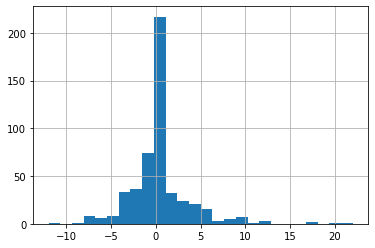

In [82]:
mins['min'].hist(bins=mins['min'].nunique())

<AxesSubplot:>

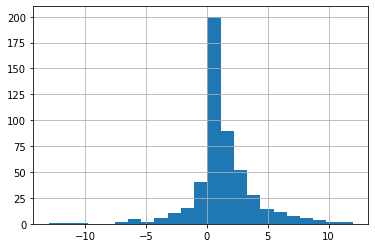

In [83]:
maxs['max'].hist(bins=maxs['max'].nunique())

In [84]:
maxs['max'].value_counts()

 1.0     200
 2.0      90
 3.0      52
 4.0      28
 0.0      25
-1.0      15
-2.0      15
 5.0      14
 6.0      11
-3.0      10
 7.0       8
 8.0       6
-4.0       6
-6.0       5
 9.0       4
-5.0       2
 10.0      2
-7.0       2
-11.0      1
-10.0      1
-13.0      1
 12.0      1
 11.0      1
Name: max, dtype: int64

In [85]:
weighted_vorp=nba_to_eur.groupby(['Player_Upper','league','is_euroleague']).apply(lambda x: pd.Series([np.average(x['VORP'], weights=x['Min'])], index=['VORP']))
weighted_vorp.reset_index(inplace=True)

In [86]:
weighted_vorp['league']=weighted_vorp.apply(lambda x: 'Euroleague' if x['is_euroleague']==1 else 'EUR' if x['league']=='EUR' else 'NBA',axis=1)

In [87]:
weighted_vorp=weighted_vorp.pivot(index='Player_Upper',columns='league',values='VORP')
weighted_vorp.reset_index(inplace=True)

In [88]:
weighted_vorp['EUR_weight']=weighted_vorp.apply(lambda x: 1 if np.isnan(x['Euroleague']) else 0 if np.isnan(x['EUR']) else 1/3,axis=1)
weighted_vorp['Euroleague_weight']=weighted_vorp.apply(lambda x: 1 if np.isnan(x['EUR']) else 0 if np.isnan(x['Euroleague']) else 2/3,axis=1)


weighted_vorp['weighted_EUR']=weighted_vorp['EUR']*weighted_vorp['EUR_weight']
weighted_vorp['weighted_Euroleague']=weighted_vorp['Euroleague']*weighted_vorp['Euroleague_weight']

In [89]:
weighted_vorp.fillna(0,inplace=True)

In [90]:
weighted_vorp['Total EUR']=weighted_vorp['EUR']+weighted_vorp['Euroleague']

In [92]:
avg_inc=(weighted_vorp['Total EUR']-weighted_vorp['NBA'])[(weighted_vorp['Total EUR']-weighted_vorp['NBA'])>0].mean()

def success(nba,eur):
    global avg_inc
    if nba<=0 and eur>0:
        x=1
    elif nba>0 and eur>nba+avg_inc:
        x=1
    else:
        x=0
    return x

In [93]:
weighted_vorp['success'] = weighted_vorp.apply(lambda x: success(x['NBA'], x['Total EUR']), axis=1)

In [97]:
nba_to_eur=nba_to_eur.merge(weighted_vorp[['Player_Upper','success']], left_on='Player_Upper',right_on='Player_Upper',how='left')

In [966]:
weighted_vorp.to_csv('weighted_vorp.csv',index=False)

In [98]:
nba_to_eur.to_csv('vorp.csv',index=False)